In [1]:
import random
import pandas as pd
import numpy as np
import os
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, PredefinedSplit, KFold, TimeSeriesSplit
from sklearn.metrics import make_scorer
import matplotlib.pyplot as plt
from tqdm import tqdm
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.utils.plotting import plot_series
from sklearn.preprocessing import MinMaxScaler	
# i=1
# train_df = pd.read_csv(f'./submit/train_building{i}.csv')
    
# train_df = train_df.groupby(['day', 'hour'])['power_consumption'].mean().reset_index().pivot(index='day', columns='hour', values='power_consumption')

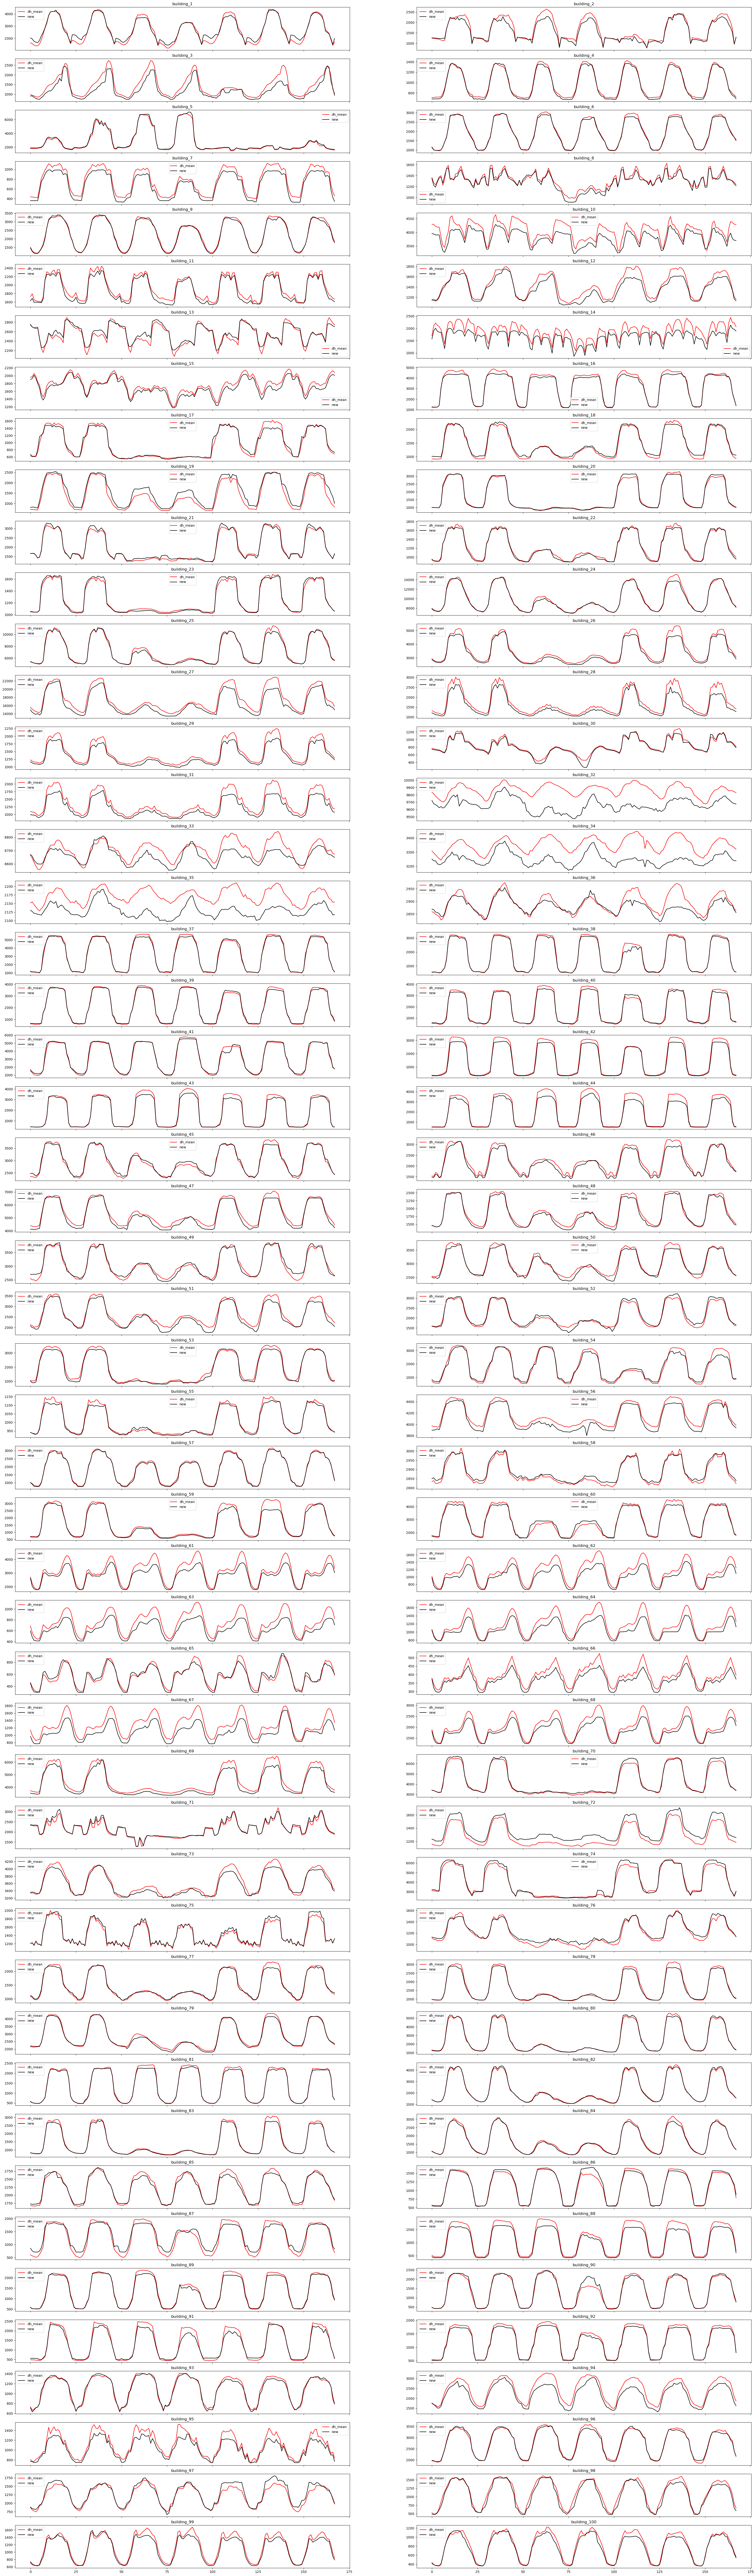

In [2]:
import random
import pandas as pd
import numpy as np
import os
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, PredefinedSplit, KFold, TimeSeriesSplit
from sklearn.metrics import make_scorer
import matplotlib.pyplot as plt
from tqdm import tqdm
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.utils.plotting import plot_series
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings(action='ignore')

fig, ax = plt.subplots(50,2,figsize=(40, 140), sharex=True)
ax = ax.flatten() 
for i in range(1,101,1):
    #day_hour_mean생성
	train_df = pd.read_csv(f'./submit/train_building{i}.csv')
		# 새로운 행 순서를 지정한 리스트 생성
	train_df = train_df.groupby(['day', 'hour'])['power_consumption'].mean().reset_index().pivot(index='day', columns='hour', values='power_consumption')
	# iloc를 사용하여 행 순서 변경
	new_order = [3,4,5,6,0,1,2]
	train_df = train_df.iloc[new_order]
	day_hour_mean = train_df.values.flatten()
	#온도 등 column을 보고싶을때
	test_df =  pd.read_csv(f'./submit/test_building{i}.csv')
	temp = test_df['temperature']
	#새로 plot할거
	new_pred =  pd.read_csv('./submission\submission_xgb_season.csv')
	submission_autog54_lbw = pd.read_csv('./submission\submission_autog54_lbw.csv')
	submission_xgb_wsw_THI_cat =  pd.read_csv('./submission\submission_xgb_wsw_THI_cat.csv')
	# submission_xgb_split_lbw = pd.read_csv('./submission/submission_xgb_split_lbw.csv')
	# submission_xgb_holly2_lbw = pd.read_csv('./submission/submission_xgb_holly2_lbw.csv')
	# submission_xgb_noclip_plus_lbw = pd.read_csv('./submission/submission_xgb_noclip_plus_lbw.csv')
	
	new =  new_pred.loc[new_pred.index[168*(i-1):168*(i)], 'answer']
	submission_autog54_lbw = submission_autog54_lbw.loc[submission_autog54_lbw.index[168*(i-1):168*(i)], 'answer']
	submission_xgb_wsw_THI_cat = submission_xgb_wsw_THI_cat.loc[submission_xgb_wsw_THI_cat.index[168*(i-1):168*(i)], 'answer']
	#submission_xgb_split_lbw = submission_xgb_split_lbw.loc[submission_xgb_split_lbw.index[168*(i-1):168*(i)], 'answer']
	#submission_xgb_holly2_lbw = submission_xgb_holly2_lbw.loc[submission_xgb_holly2_lbw.index[168*(i-1):168*(i)], 'answer']
	#submission_xgb_noclip_plus_lbw = submission_xgb_noclip_plus_lbw.loc[submission_xgb_noclip_plus_lbw.index[168*(i-1):168*(i)], 'answer']

	#ax1.plot(np.arange(168),submission_xgb_split_lbw,label = 'submission_xgb_split_lbw, 5.79')
	#ax1.plot(np.arange(168),submission_xgb_holly2_lbw,label = 'submission_xgb_holly2_lbw, 6.31')
	#ax1.plot(np.arange(168),submission_xgb_noclip_plus_lbw,label = 'submission_xgb_noclip_plus_lbw, 7.47')	
	# 그래프 제목 추가
	ax[i-1].set_title(f"building_{i}")
	#데이-아워-민
	ax[i-1].plot(np.arange(168),day_hour_mean,label = 'dh_mean',color='red')	
	#plot
	#ax[i-1].plot(np.arange(168),submission_autog54_lbw,label = 'autog54, 5.72')	
	#ax[i-1].plot(np.arange(168),submission_xgb_wsw_THI_cat,label = 'THI_cat',color='orange')
	ax[i-1].plot(np.arange(168),new,label = 'new',color='black')
	ax[i-1].legend()
plt.show()